## Importing Libraries & Understanding Data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from math import sqrt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [2]:
# Load Dataset for train
os.chdir("D:/Imarticus/Supervised Learning/Linear Regression with OLS/Dataset shared by sir")
train=pd.read_csv('D:/Imarticus/Supervised Learning/Linear Regression with OLS/Dataset shared by sir/train.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
train.shape # To check the data size

(1460, 81)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Analysis on the target Variable

### To find the skewness

##### What do you do when data is skewed?
Image result for what to do after we know the plot is skewed
Conclusion. If we have a skewed data then it may harm our results. So, in order to use a skewed data we have to apply a log transformation over the whole set of values to discover patterns in the data and make it usable for the statistical model.

C:\Users\sasai\anaconda3.32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


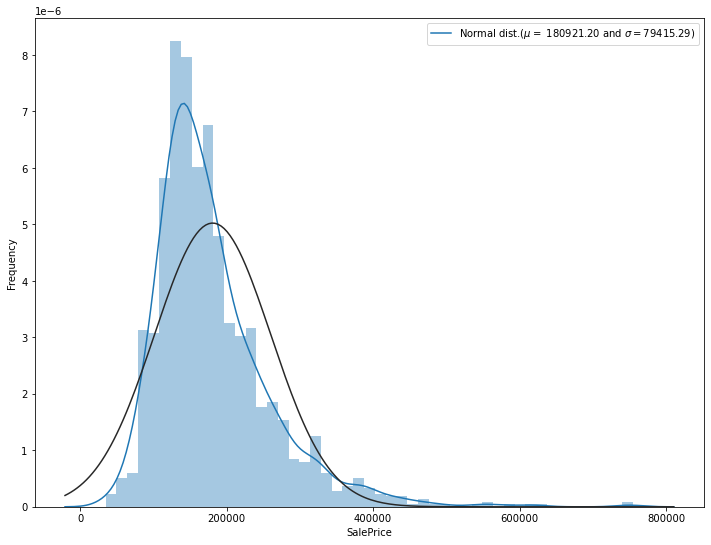

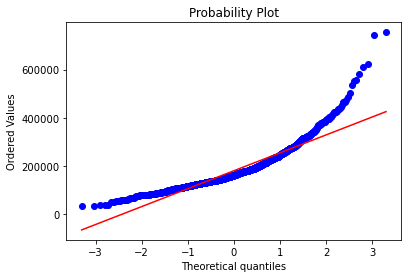

In [7]:
plt.subplots(figsize =(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)

# get the fitted parameters used by the function
(mu,sigma)=stats.norm.fit(train['SalePrice'])

# Plot with the distribution
plt.legend(['Normal dist.($\mu=$ {:.2f} and $\sigma=${:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')

# Probability Plot
fig=plt.figure()
stats.probplot(train['SalePrice'],plot=plt)
plt.show()

The target variable is right skewed. Now we need to transform this variable and make it normal distribution.

### Use of a log transformation function is the most commmon way to make a more normal distribution.we will do that in the following section.

C:\Users\sasai\anaconda3.32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


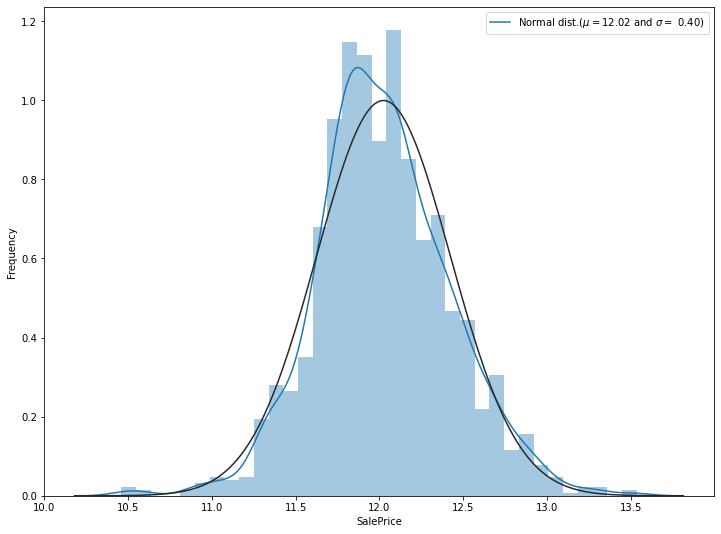

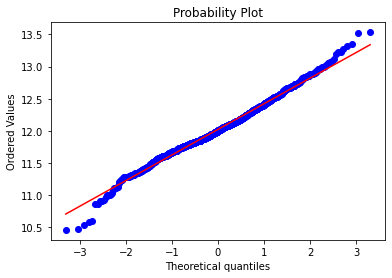

In [8]:
# we use log which is a part of numpy library
train['SalePrice']=np.log1p(train['SalePrice'])

# Check again for normal Distribution
plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'],fit=stats.norm)

#get the fitted parametes used by the function
(mu,sigma)=stats.norm.fit(train['SalePrice'])

# plot with  the distribution
plt.legend(['Normal dist.($\mu=${:.2f} and $\sigma=$ {:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')

# Probability Plot
fig=plt.figure()
stats.probplot(train['SalePrice'],plot=plt)
plt.show()

In [9]:
# Let's Check the missing data if any 
# Gives the list of columns which have only null values
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [10]:
# Tell us column with missing values using boolean functions or 
# Generates a boolean array that can be passed as an index to columns attributes of a train
train.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

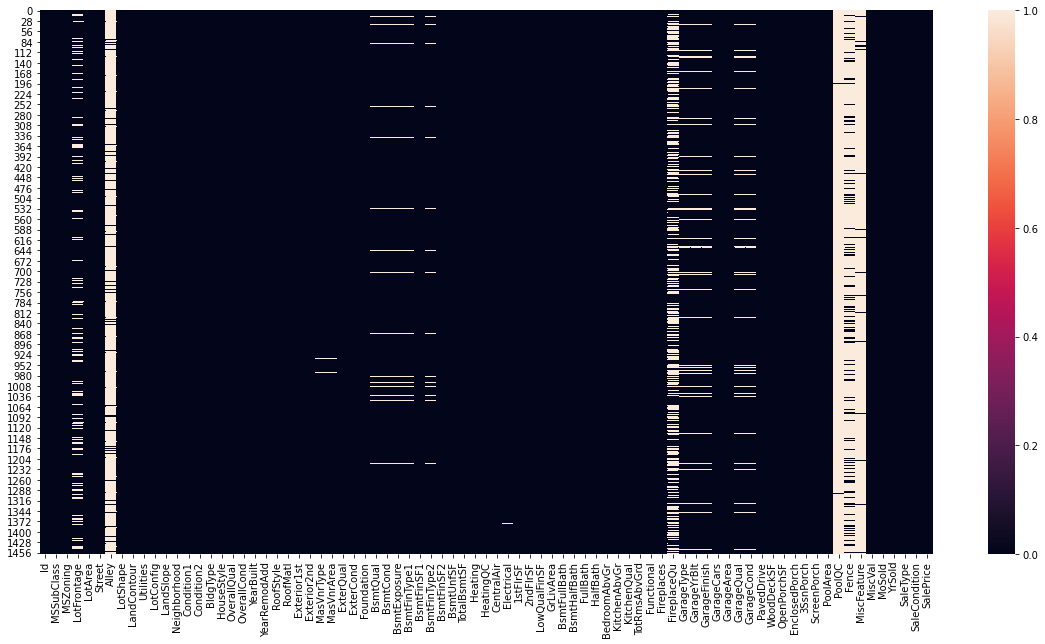

In [11]:
# plot of missing value attributes
plt.figure(figsize=(20,10))
sns.heatmap(train.isnull())
plt.show()

In [12]:
#Missing value Count in each of the columns
# Percentage of null values in the dataset 
Isnull=train.isnull().sum()/len(train)*100
Isnull=Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [13]:
# Another way to get the Percentage of null values in the dataset for upto 60 columns from start
train.isnull().sum().head(60)/train.shape[0] * 100.00

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage     17.739726
LotArea          0.000000
Street           0.000000
Alley           93.767123
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.547945
MasVnrArea       0.547945
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinSF1       0.000000
BsmtFinType2     2.602740
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF 

In [14]:
# Visualizing missing values
#Convert to a dataframe
Isnull=Isnull.to_frame()

In [15]:
Isnull.columns=['count'] # creating a column naming count that contains the % of missing values variable wise

In [16]:
Isnull.index.names=['Name'] # Creating a column that contains the name of the variable

In [17]:
Isnull['Name']=Isnull.index #using index values i.e the feature names and storing in new column 'Name' we just created 

In [18]:
Isnull

,count,Name
Name,,
PoolQC,99.520548,PoolQC
MiscFeature,96.301370,MiscFeature
Alley,93.767123,Alley
Fence,80.753425,Fence
FireplaceQu,47.260274,FireplaceQu
LotFrontage,17.739726,LotFrontage
GarageType,5.547945,GarageType
GarageYrBlt,5.547945,GarageYrBlt
GarageFinish,5.547945,GarageFinish


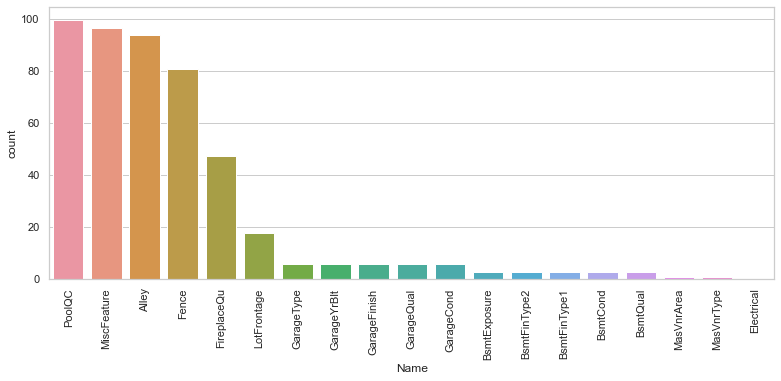

In [19]:
# Plot missing values
plt.figure(figsize=(13,5))
sns.set(style='whitegrid')
sns.barplot(x='Name', y='count',data=Isnull)
plt.xticks(rotation=90)
plt.show()

In [20]:
# Correlation between train attributes 
# Seprate data which has only numeric values
train_corr=train.select_dtypes(include=[np.number])

In [21]:
train_corr.shape

(1460, 38)

In [22]:
#delete id because there is no need for correlation plot
del train_corr['Id']

## Correlation

<AxesSubplot:>

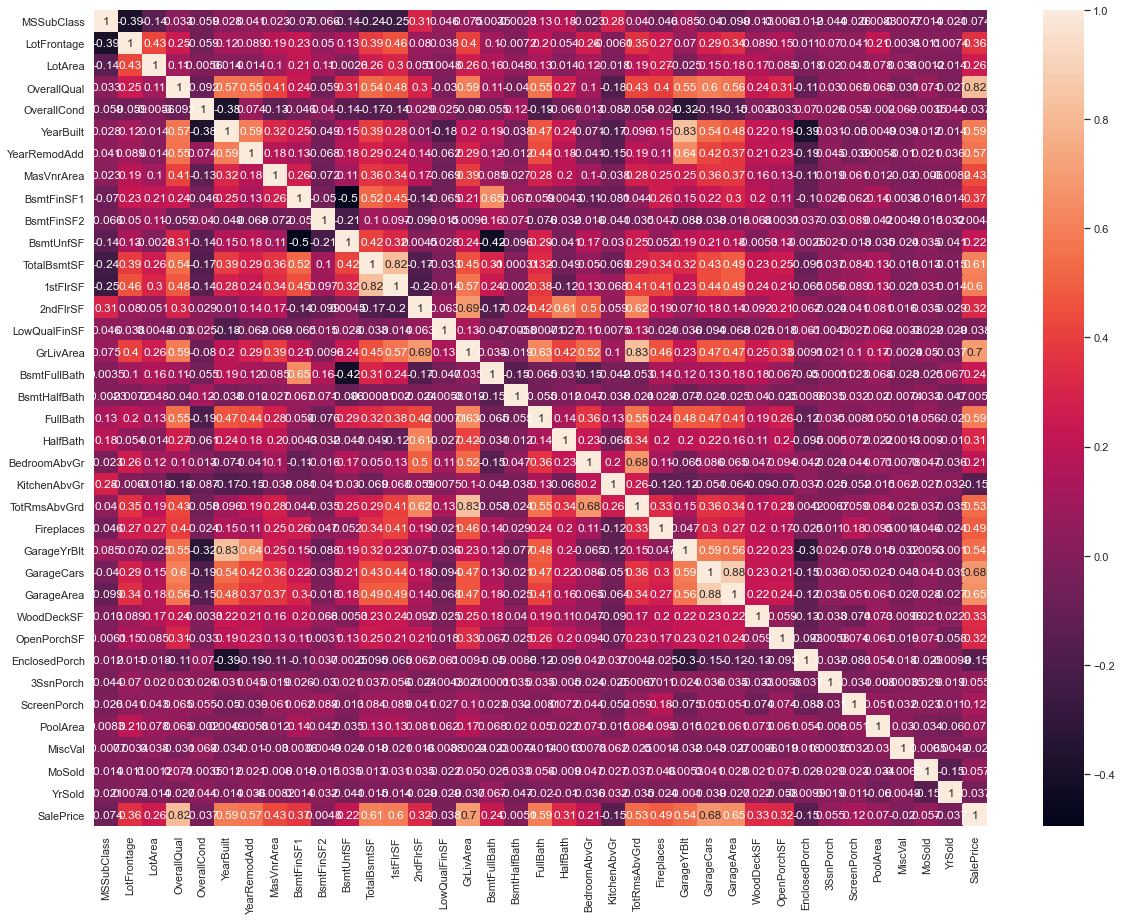

In [23]:
# Correlation Plot
corr=train_corr.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True)

### Top 50% Correlation train attributes with target variables

In [24]:
(corr['SalePrice']>0.5)

MSSubClass       False
LotFrontage      False
LotArea          False
OverallQual       True
OverallCond      False
YearBuilt         True
YearRemodAdd      True
MasVnrArea       False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF       True
1stFlrSF          True
2ndFlrSF         False
LowQualFinSF     False
GrLivArea         True
BsmtFullBath     False
BsmtHalfBath     False
FullBath          True
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd      True
Fireplaces       False
GarageYrBlt       True
GarageCars        True
GarageArea        True
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
SalePrice         True
Name: SalePrice, dtype: bool

In [25]:
corr.index

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

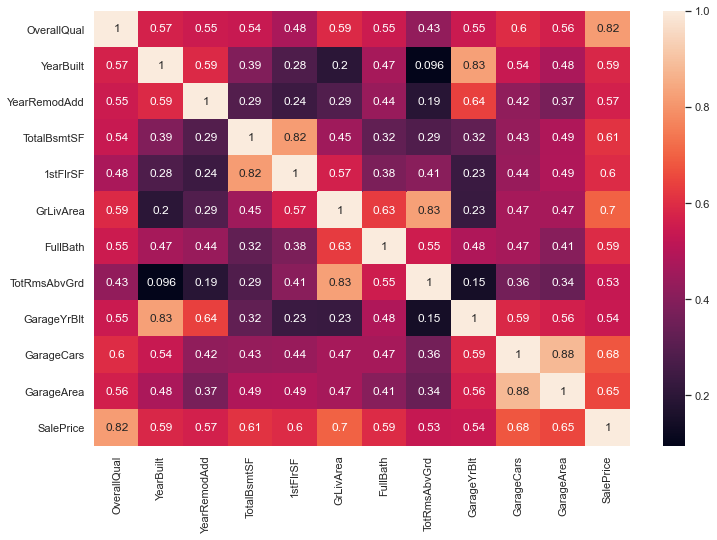

In [26]:
top_feature=corr.index[abs(corr['SalePrice']>0.5)] # abs is 
plt.subplots(figsize=[12,8])
top_corr=train[top_feature].corr()
sns.heatmap(top_corr,annot=True)
plt.show()

Note:-It will give the correlation with saleprice with other variable as can be seen in saleprice column

In [27]:
corr[corr['SalePrice']>0.5] # it will give all the correlation with other variable as shown in the heatmap

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.817185
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.586570
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.565608
TotalBsmtSF,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,0.104810,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.612134
1stFlrSF,-0.251758,0.457181,0.299475,0.476224,-0.144203,0.281986,0.240379,0.344501,0.445863,0.097117,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.596981
GrLivArea,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,-0.009640,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.700927
FullBath,0.131608,0.198769,0.126031,0.550600,-0.194149,0.468271,0.439046,0.276833,0.058543,-0.076444,...,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.594771
TotRmsAbvGrd,0.040380,0.352096,0.190015,0.427452,-0.057583,0.095589,0.191740,0.280682,0.044316,-0.035227,...,0.165984,0.234192,0.004151,-0.006683,0.059383,0.083757,0.024763,0.036907,-0.034516,0.534422
GarageYrBlt,0.085072,0.070250,-0.024947,0.547766,-0.324297,0.825667,0.642277,0.252691,0.153484,-0.088011,...,0.224577,0.228425,-0.297003,0.023544,-0.075418,-0.014501,-0.032417,0.005337,-0.001014,0.541073
GarageCars,-0.040110,0.285691,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,-0.038264,...,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.680625


In [28]:
corr[corr['SalePrice']>0.5]['SalePrice'] # it gives us the correlation between saleprice only

OverallQual     0.817185
YearBuilt       0.586570
YearRemodAdd    0.565608
TotalBsmtSF     0.612134
1stFlrSF        0.596981
GrLivArea       0.700927
FullBath        0.594771
TotRmsAbvGrd    0.534422
GarageYrBlt     0.541073
GarageCars      0.680625
GarageArea      0.650888
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [29]:
# Overallqual is highly correlated with saleprice and has a correlation coeff of 0.82 
# Unique values of QverallQual
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

C:\Users\sasai\anaconda3.32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

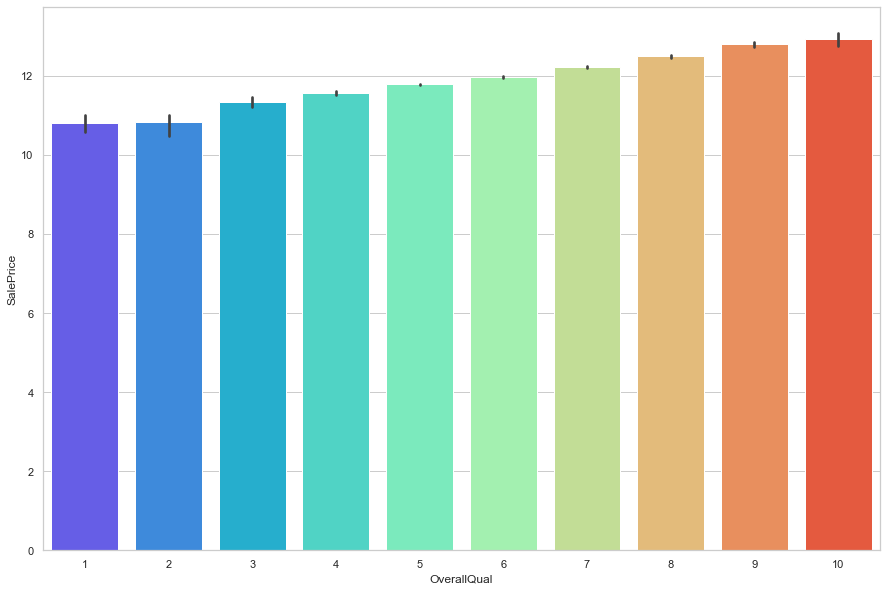

In [30]:
#barplot
plt.figure(figsize=(15,10))
sns.barplot(train.OverallQual,train.SalePrice,palette='rainbow')

In [31]:
train.SalePrice

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

C:\Users\sasai\anaconda3.32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

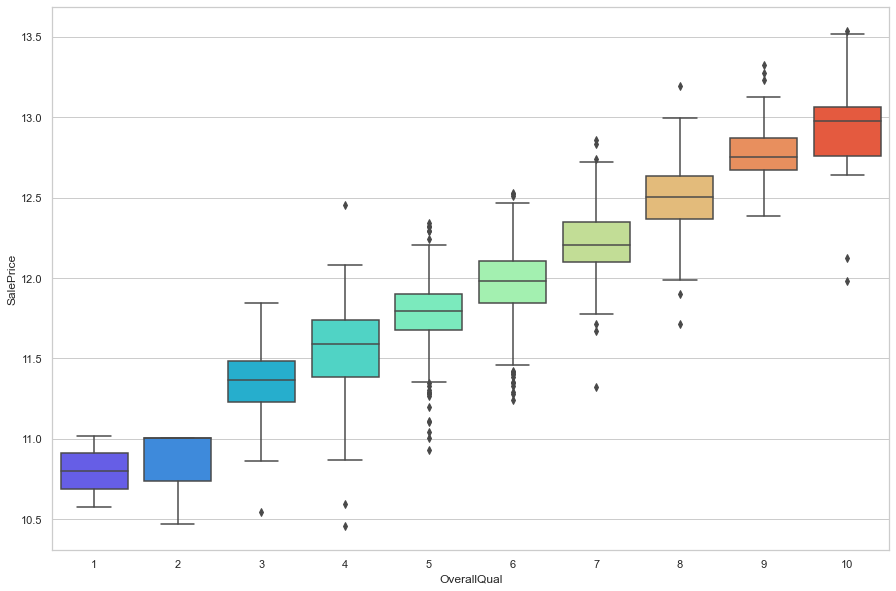

In [32]:
#boxplot
plt.figure(figsize=(15,10))
sns.boxplot(train.OverallQual,train.SalePrice,palette='rainbow')

C:\Users\sasai\anaconda3.32\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


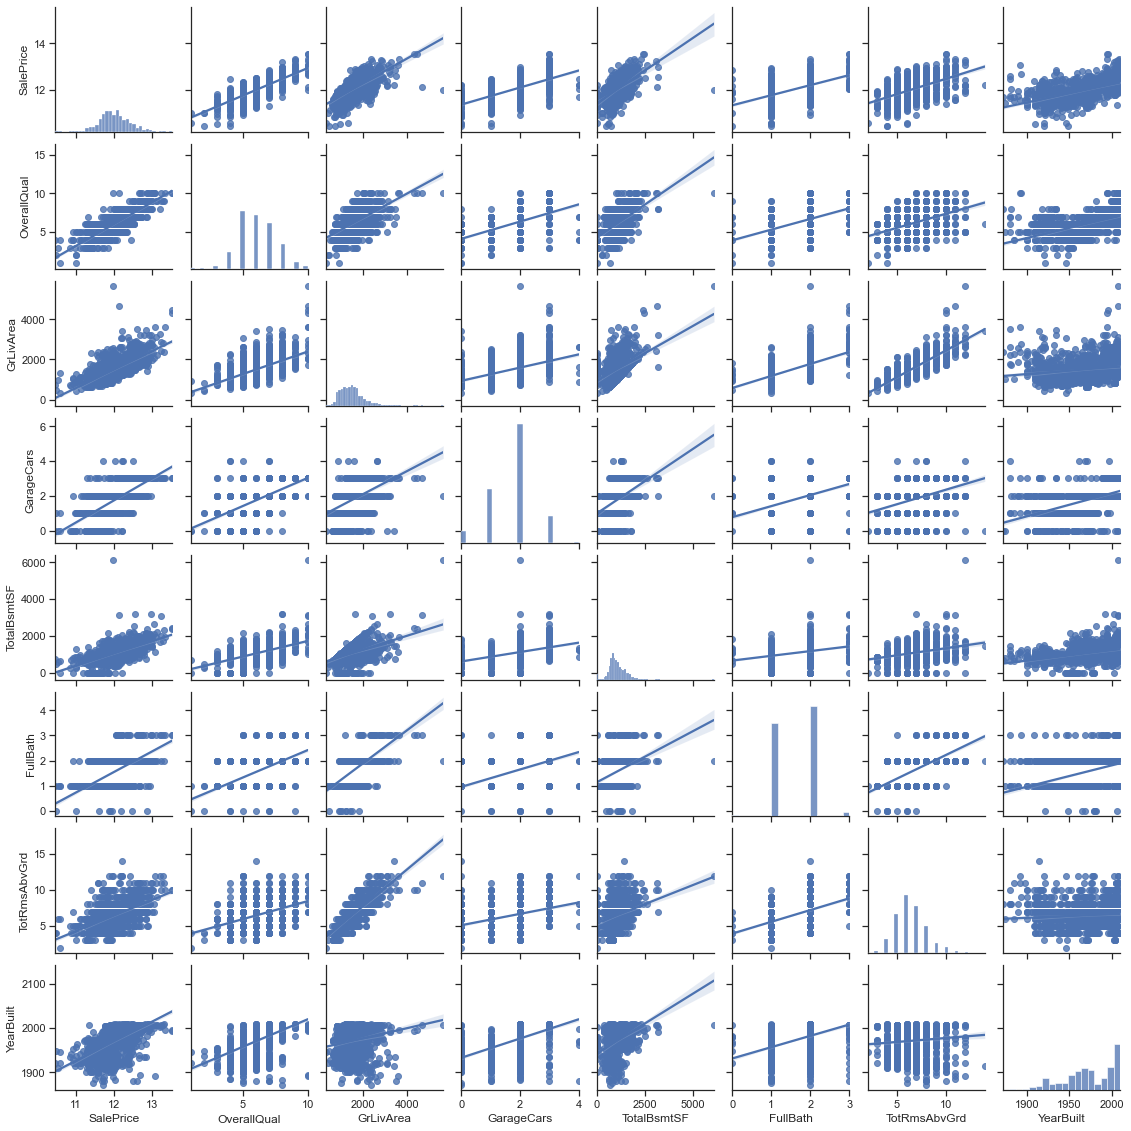

In [33]:
col=['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','TotRmsAbvGrd','YearBuilt']
sns.set(style='ticks')
sns.pairplot(train[col],size=2,kind='reg')

### Regression plot is used for following puposes
1. Regression analysis is a reliable method of identifying which variables have impact on a topic of interest. The process of performing a regression allows you to confidently determine which factors matter most, which factors can be ignored, and how these factors influence each other.
2. The main uses of regression analysis are forecasting, time series modeling and finding the cause and effect relationship between variables.
3. To Check the Multicollinearity Correlation.

## <font color='red'>how to know the high and less corelation between the variable?</font>

In [34]:
train[col].SalePrice.describe()

count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

In [35]:
train[col].shape

(1460, 8)

In [36]:
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.073959
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.355879
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.257320
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.817185
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.036868
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.586570
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.565608
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.430809
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.372023
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,0.004832


In [37]:
corr['SalePrice'] # it will tells us the correlation between saleprice with all the other variable

MSSubClass      -0.073959
LotFrontage      0.355879
LotArea          0.257320
OverallQual      0.817185
OverallCond     -0.036868
YearBuilt        0.586570
YearRemodAdd     0.565608
MasVnrArea       0.430809
BsmtFinSF1       0.372023
BsmtFinSF2       0.004832
BsmtUnfSF        0.221985
TotalBsmtSF      0.612134
1stFlrSF         0.596981
2ndFlrSF         0.319300
LowQualFinSF    -0.037963
GrLivArea        0.700927
BsmtFullBath     0.236224
BsmtHalfBath    -0.005149
FullBath         0.594771
HalfBath         0.313982
BedroomAbvGr     0.209043
KitchenAbvGr    -0.147548
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
GarageYrBlt      0.541073
GarageCars       0.680625
GarageArea       0.650888
WoodDeckSF       0.334135
OpenPorchSF      0.321053
EnclosedPorch   -0.149050
3SsnPorch        0.054900
ScreenPorch      0.121208
PoolArea         0.069798
MiscVal         -0.020021
MoSold           0.057330
YrSold          -0.037263
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [38]:
print('Find the most importatnt features relative to the target')
corr=train.corr()
corr.sort_values(['SalePrice'],ascending=False,inplace=True)
corr.SalePrice

Find the most importatnt features relative to the target


SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

In [39]:
#Imputing missing values
#PoolQC has missing value ratio of 99%+,so there we fill 'None'
train['PoolQC']=train['PoolQC'].fillna('None')

In [40]:
train.PoolQC.value_counts()

None    1453
Gd         3
Fa         2
Ex         2
Name: PoolQC, dtype: int64

In [41]:
#For features having 50% missing values again fill with 'None'

In [42]:
train['MiscFeature']=train['MiscFeature'].fillna('None')

In [43]:
train.MiscFeature.value_counts()

None    1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64

In [44]:
train['Alley']=train['Alley'].fillna('None')

In [45]:
train['Fence']=train['Fence'].fillna('None')

In [46]:
train['FireplaceQu']=train['FireplaceQu'].fillna('None')

In [47]:
train.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [48]:
train.groupby('Neighborhood')['LotFrontage'].median()

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    52.0
ClearCr    80.0
CollgCr    70.0
Crawfor    74.0
Edwards    65.5
Gilbert    65.0
IDOTRR     60.0
MeadowV    21.0
Mitchel    73.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    91.0
NridgHt    88.5
OldTown    60.0
SWISU      60.0
Sawyer     71.0
SawyerW    66.5
Somerst    73.5
StoneBr    61.5
Timber     85.0
Veenker    68.0
Name: LotFrontage, dtype: float64

In [49]:
#Groupby Neighborhood and fill in the missing value by the median Lotfrontage of all the neighborhood
train['LotFrontage']=train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [50]:
train.groupby('Neighborhood')['LotFrontage'].fillna(train.groupby('Neighborhood')['LotFrontage'].median())

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [51]:
train.LotFrontage.describe()

count    1460.000000
mean       70.199658
std        22.431902
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

#### Below using fillna we replaced the missing values with 'none for catgorical value and '0'  for numerical values

In [52]:
# Garagetype,garagefinidh,garageequal and garagecond will replace them with none
for col in ['GarageType','GarageFinish','GarageQual','GarageCond']:
    train[col]=train[col].fillna('None')

In [53]:
#Garageyrbit,garagearea and garagecards replaced with 0
for col in ['GarageYrBlt','GarageArea','GarageCars']:
     train[col]=train[col].fillna(int(0))

In [54]:
for col in ['BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual']:
    train[col]=train[col].fillna('None')

In [55]:
train['MasVnrArea']=train['MasVnrArea'].fillna(int(0))

In [56]:
train['MasVnrType']=train['MasVnrType'].fillna('None')

In [57]:
train['Electrical'].mode()[0]

'SBrkr'

In [58]:
train['Electrical']=train['Electrical'].fillna(train['Electrical']).mode()[0]

In [59]:
# REMOVE utilities
train= train.drop(['Utilities'],axis=1)

<AxesSubplot:>

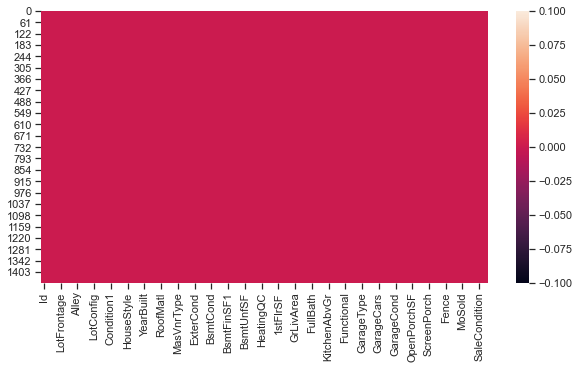

In [60]:
#Check if theere is any null value or not
plt.figure(figsize=(10,5))
sns.heatmap(train.isnull())

In [61]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckS

### Label Encoding

In [62]:
train_cat=train.select_dtypes(include='object').columns # Seperarting categorical Variables

#### <font color='red'> Why do we need to fit and transform the data ?</font>

In [63]:
# Label encoding Categorical Variables
for c in train_cat:
    lbl=LabelEncoder()
    lbl.fit(list(train[c].values))
    train[c]=lbl.transform(list(train[c].values))

In [64]:
# Prepare data for prediction
y=train['SalePrice']

In [65]:
# delete SalePrice
del train['SalePrice']

In [66]:
# Take The value as X and Y
x=train.values
y=y.values

In [67]:
#Split data into train and test format
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [68]:
#perform Linear regression
model=LinearRegression()

In [69]:
model.fit(x_train,y_train)

LinearRegression()

In [70]:
# Making Prediction using the model
y_pred=model.predict(x_test)

In [71]:
# prediction for a single data point
print('Predict Value',(model.predict([x_test[142]])))
print('Actual Value',(y_test[142]))

Predict Value [11.62827329]
Actual Value 11.767187766223199


In [72]:
#Score/Accuracy
print('Accuracy',model.score(x_test,y_test)*100)

Accuracy 89.22310614679725


In [73]:
mse=mean_squared_error(y_test,y_pred)
r_sqaured = r2_score(y_test, y_pred)

In [74]:
rmse=sqrt(mse)

In [75]:
print('Mean_Squared_Error:',mse)
print('Root_Mean_Sqaured_Erro:',rmse)
print('r_sqaure_value:',r_sqaured)

Mean_Squared_Error: 0.0180589471361597
Root_Mean_Sqaured_Erro: 0.1343835820930507
r_sqaure_value: 0.8922310614679725


C:\Users\sasai\anaconda3.32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\sasai\anaconda3.32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


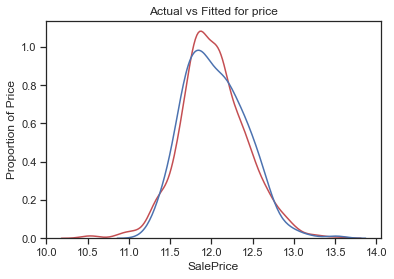

In [76]:
#distribution plot to compare actual vs predicted values for price after few modification.
ax1=sns.distplot(y,hist=False,color='r',label='Actual Value')
sns.distplot(y_pred,hist=False,color='b',label='fitted Values',ax=ax1)
plt.title('Actual vs Fitted for price')
plt.xlabel('SalePrice')
plt.ylabel('Proportion of Price')
plt.show()

Text(0.5, 0.98, 'Actual and Predicted')

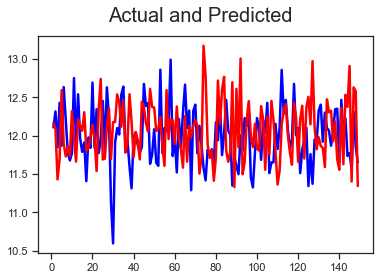

In [77]:
# Actual vs Predicted
# Check For the first 150 Observations

c=[i  for i in range(1,150,1)]
fig=plt.figure()
plt.plot(c,y[1:150],color="blue",linewidth=2.5,linestyle="-")
plt.plot(c,y_pred[1:150],color="red",linewidth=2.5,linestyle="-")
fig.suptitle('Actual and Predicted',fontsize=20)        #plot Heading

In [78]:
len(y_test)

292

In [79]:
len(y_pred)

292

Text(0, 0.5, 'Actual-Predicted')

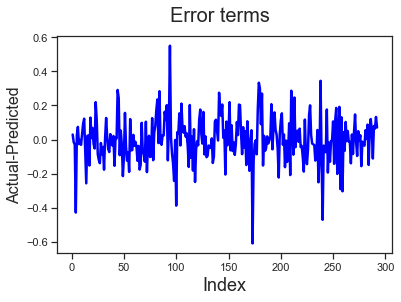

In [80]:
# Error terms

c=[i for i in range(1,293,1)]
fig=plt.figure()
plt.plot(c,y_test-y_pred,color="blue",linewidth=2.5,linestyle="-")
fig.suptitle('Error terms',fontsize=20)        #plot Heading
plt.xlabel('Index',fontsize=18)                       #x-label
plt.ylabel('Actual-Predicted',fontsize=16)                #y-Label

###  Polynomial Regression

In [81]:
pr= PolynomialFeatures(degree=2)

In [82]:
train_pr=pr.fit_transform(x_test)

In [83]:
model_pr=model.fit(train_pr,y_test)

In [84]:
yhat_pr=model.predict(train_pr)

In [85]:
yhat_pr[0:5]

array([11.93164238, 12.14950759, 12.05980911, 11.00211651, 11.71994776])

In [86]:
print('R Squared using Polynomial Regression:',r2_score(y_test,yhat_pr))
print('Mean Squared errorusing Polynomial Regerssion:',mean_squared_error(y_test,yhat_pr))
print('Root mean Squared error using Polynomial Regression:',np.sqrt(mean_squared_error(y_test,yhat_pr)))

R Squared using Polynomial Regression: 1.0
Mean Squared errorusing Polynomial Regerssion: 2.427090527915669e-22
Root mean Squared error using Polynomial Regression: 1.557912233701138e-11


C:\Users\sasai\anaconda3.32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\sasai\anaconda3.32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


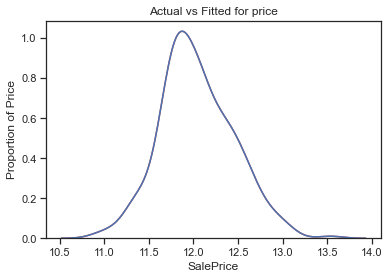

In [87]:
#distribution plot to compare actual vs predicted values for price after few modification.
ax1=sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(yhat_pr,hist=False,color='b',label='fitted Values',ax=ax1)
plt.title('Actual vs Fitted for price')
plt.xlabel('SalePrice')
plt.ylabel('Proportion of Price')
plt.show()

In [88]:
from sklearn.model_selection import cross_val_score

In [89]:
Rcross= cross_val_score(model,x_train,y_train ,cv=4)

In [90]:
Rcross

array([0.89208102, 0.51204039, 0.88379898, 0.48690605])